In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import env
import wrangle
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import sklearn.preprocessing

In [2]:
df = wrangle.get_telco_data()

In [3]:
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1695 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [5]:
df = wrangle.clean_telco(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1695 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.1+ KB


In [7]:
df.index = df.customer_id
df = df.drop(columns='customer_id')
df.head()

,monthly_charges,tenure,total_charges
customer_id,,,
0013-SMEOE,109.70,71,7904.25
0014-BMAQU,84.65,63,5377.80
0016-QLJIS,90.45,65,5957.90
0017-DINOC,45.20,54,2460.55
0017-IUDMW,116.80,72,8456.75


In [8]:
train, validate, test = wrangle.split(df, stratify_by=None)

In [9]:
train.head()

,monthly_charges,tenure,total_charges
customer_id,,,
7501-IWUNG,73.80,61,4616.05
1303-SRDOK,69.05,55,3842.60
3967-VQOGC,24.90,67,1680.25
3777-XROBG,19.55,58,1079.65
5075-JSDKI,24.45,59,1493.10


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results

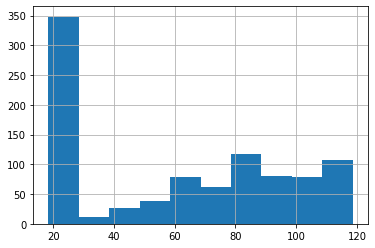

In [10]:
train.monthly_charges.hist()

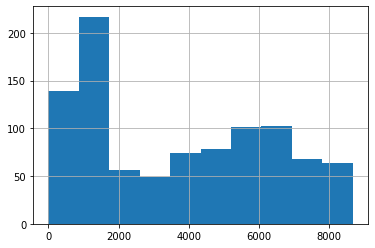

In [11]:
train.total_charges.hist()

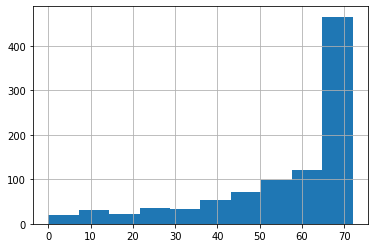

In [12]:
train.tenure.hist()

In [13]:
# Make the thing

scaler = sklearn.preprocessing.MinMaxScaler()

In [14]:
# Fit the thing on the training data

scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [16]:
# turn the numpy arrays into dataframes

train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

In [17]:
# Check out a few sample rows

train_scaled.head()

,monthly_charges,tenure,total_charges
0,0.552618,0.847222,0.532410
1,0.505237,0.763889,0.443201
2,0.064838,0.930556,0.193798
3,0.011471,0.805556,0.124526
4,0.060349,0.819444,0.172213


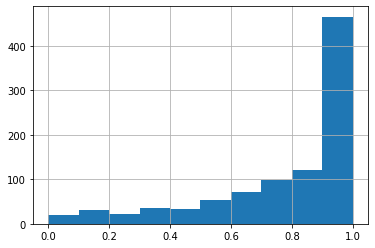

In [18]:
train_scaled.tenure.hist()

### 2. Apply the .inverse_transform method to your scaled data. 

In [19]:
# Borrowing Ravinder's visualization function

def visualize_scaled_data(scaler, scaler_name, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')

    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout();

In [20]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaled = scaler.fit_transform(train[['monthly_charges', 'tenure']])
scaled

array([[0.55261845, 0.84722222],
       [0.50523691, 0.76388889],
       [0.06483791, 0.93055556],
       ...,
       [0.06683292, 1.        ],
       [0.90024938, 0.63888889],
       [0.01546135, 0.52777778]])

In [21]:
scaled_df = pd.DataFrame(scaled, index = train.index, columns = ['monthly_charges', 'tenure'])
scaler.inverse_transform(scaled_df)

array([[ 73.8 ,  61.  ],
       [ 69.05,  55.  ],
       [ 24.9 ,  67.  ],
       ...,
       [ 25.1 ,  72.  ],
       [108.65,  46.  ],
       [ 19.95,  38.  ]])

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data

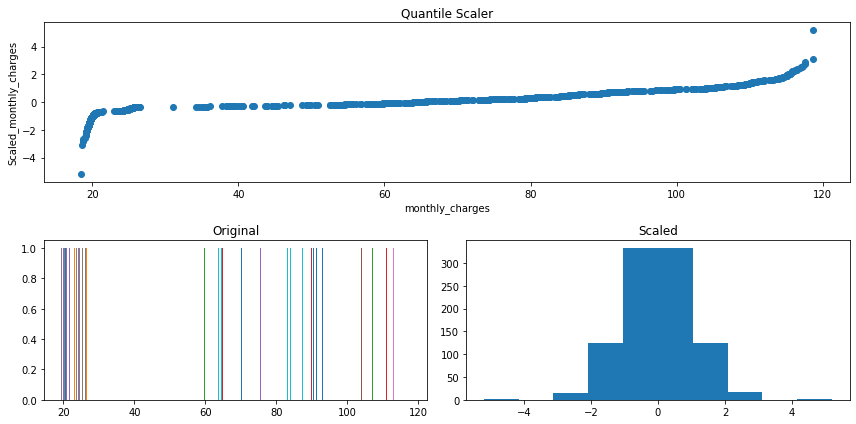

In [22]:

visualize_scaled_data(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', 'monthly_charges')

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results.

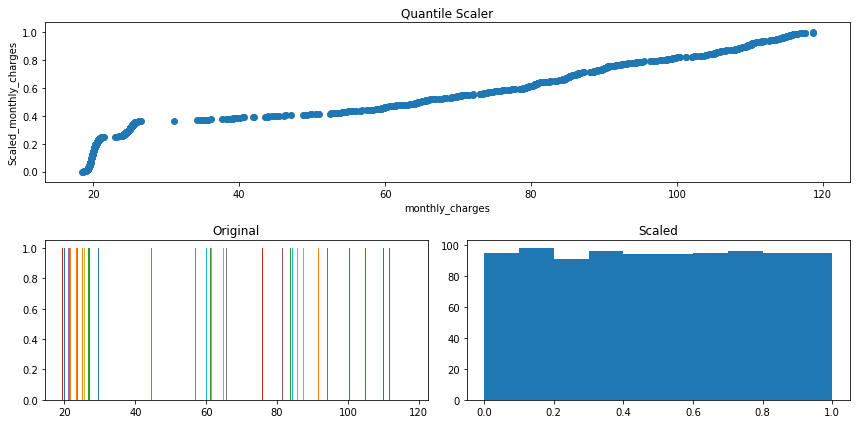

In [24]:
visualize_scaled_data(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler', 'monthly_charges')

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each

In [25]:
def Standard_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs
    """

    scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [26]:
# Use the Standard_Scaler Function defined above

scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Standard_Scaler(X_train, X_validate, X_test)

X_train_scaled.head()

NameError: name 'X_train' is not defined